In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../dataset/MDA_Undersampling.csv',encoding='CP949')

In [4]:
from sklearn.model_selection import train_test_split
MDA_X = df.iloc[:,:-1]
MDA_y = df['label']
MDA_x_train, MDA_x_test, MDA_y_train, MDA_y_test = train_test_split(MDA_X, MDA_y, test_size=0.2, random_state=0)

In [5]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(MDA_x_train,MDA_y_train)
lda_pred = lda_clf.predict(MDA_x_test)
lda_pred_proba = lda_clf.predict_proba(MDA_x_test)

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(MDA_x_train, MDA_y_train)
dt_pred = dt_clf.predict(MDA_x_test)
dt_pred_proba = dt_clf.predict_proba(MDA_x_test)

In [23]:
#디시전트리 하이퍼파라미터 구하기
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[3,4,5,6], #7개
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(MDA_x_train, MDA_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 13}, 최적 평균 정확도 :0.933


In [8]:

#최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 13}, 최적 평균 정확도 :0.933
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 3,min_samples_leaf=13)     
dt_clf_best.fit(MDA_x_train, MDA_y_train)
dt_best_pred = dt_clf_best.predict(MDA_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(MDA_x_test)

In [9]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(MDA_x_train, MDA_y_train)
rf_pred = rf_clf.predict(MDA_x_test)
rf_pred_proba = rf_clf.predict_proba(MDA_x_test)

In [ ]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8,10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(MDA_x_train,MDA_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


In [10]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
#최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 20}, 최적 평균 정확도 :0.938
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'auto',
                                     max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=20)
rf_clf_best.fit(MDA_x_train, MDA_y_train)
rf_best_pred = rf_clf_best.predict(MDA_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(MDA_x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [11]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(MDA_x_train, MDA_y_train)
lr_pred = lr_clf.predict(MDA_x_test)
lr_pred_proba = lr_clf.predict_proba(MDA_x_test)


In [37]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(MDA_x_train,MDA_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

최적 하이퍼 파라미어:{'C': 3, 'penalty': 'l2'}, 최적 평균 정확도:0.923


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\ProgramData\Anaconda3\lib\site-packages\sk

In [12]:
# 최적 하이퍼 파라미어:{'C': 3, 'penalty': 'l2'}, 최적 평균 정확도:0.923
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 3, penalty= 'l2')
lr_clf.fit(MDA_x_train, MDA_y_train)
lr_best_pred = lr_clf.predict(MDA_x_test)
lr_best_pred_proba = lr_clf.predict_proba(MDA_x_test)

In [13]:
# KNN 모형 구현
from sklearn.neighbors import KNeighborsClassifier
# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(MDA_x_train, MDA_y_train)
# 예측
knn_pred = knn_clf.predict(MDA_x_test)
knn_pred_proba = knn_clf.predict_proba(MDA_x_test)


In [14]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(MDA_x_train, MDA_y_train)
    knn_pred = knn_clf.predict(MDA_x_test)
    knn_score=accuracy_score(MDA_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.924791086350975
2
0.935933147632312
3
0.9415041782729805
4
0.9387186629526463
5
0.9415041782729805
6
0.9387186629526463
7
0.9442896935933147
8
0.9498607242339833
9
0.9387186629526463
10
0.9387186629526463


In [15]:
# knn 최적의 파라미터 모델 7에서 제일 높음
knn_clf = KNeighborsClassifier(n_neighbors=8)
# 분류기 학습
knn_clf.fit(MDA_x_train, MDA_y_train)
# 예측

knn_best_pred = knn_clf.predict(MDA_x_test)
knn_best_pred_proba = knn_clf.predict_proba(MDA_x_test)


In [26]:
MDA_x_train.columns

Index(['[제조]자기자본배율', '[제조]1주당순이익', '[제조]매출액순이익률', '[제조]부가가치', '[제조]총자본증가율',
       '[제조]총자본투자효율', '[제조]유동비율', '[제조]비유동자산회전률', '[제조]매입채무회전률',
       '[제조]유형자산증가율'],
      dtype='object')

In [16]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
MDA_x_train2 = MDA_x_train.copy()
MDA_x_test2 = MDA_x_test.copy()
MDA_y_train2 = MDA_y_train.copy()
MDA_y_test2 = MDA_y_test.copy()
MDA_x_train2.columns = [['자기자본배율',
 '1주당순이익',
 '매출액순이익률',
 '부가가치',
 '총자본증가율',
 '총자본투자효율',
 '유동비율',
 '비유동자산회전률',
 '매입채무회전률',
 '유형자산증가율']]
MDA_x_test2.columns =[['자기자본배율',
 '1주당순이익',
 '매출액순이익률',
 '부가가치',
 '총자본증가율',
 '총자본투자효율',
 '유동비율',
 '비유동자산회전률',
 '매입채무회전률',
 '유형자산증가율']]

params_dict = {'objective' : 'binary:MDAstic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(MDA_x_train2, MDA_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(MDA_x_test)
xgb_pred_proba = xgb_wrapper.predict_proba(MDA_x_test)


[14:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [28]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[40,43,46,50],
          'learning_rate':[0.03,0.05,0.04],
          'max_depth' : [0.8,1,2,3,4]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(MDA_x_train2,MDA_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 1733, in update
    _check_call(_LIB.X

[17:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 1733, in update
    _check_call(_LIB.X

[17:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "c:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 1733, in update
    _check_call(_LIB.X

[17:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.93304744 0.93304744
 0.93444604 0.93444604 0.93235301 0.93374674 0.93374674 0.93374674
 0.9323457  0.9323457  0.9323457  0.9323457  0.92885895 0.92746522
 0.92746522 0.92746522        nan        nan        nan        nan
 0.93305231 0.93374918 0.93305231 0.93305231 0.93374674 0.93304744
 0.93304744 0.93234814 0.93025511 0.93095197 0.9323457  0.93164884
 0.92746765 0.92746765 0.92955825 0.92746765        nan        nan
        nan        nan 0.93374918 0.93374918 0.93305231 0.93305231
 0.93374674 0.93304744 0.93304744 0.93234814 0.93164884 0.93095197
 0.93025511 0.93095197 0.92886138 0.92955825 0.92955825 0.92955825]
  warnings.warn(


In [17]:

#최적 하이퍼 파라미어:{'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 46}, 최적 평균 정확도:0.934
xgb_wrapper = XGBClassifier(learning_rate= 0.03, max_depth=3, n_estimators= 46)

xgb_wrapper.fit(MDA_x_train2, MDA_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(MDA_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(MDA_x_test)

In [26]:
MDA_y_train.reset_index(drop=True, inplace=True)
MDA_y_test.reset_index(drop=True, inplace=True)
MDA_x_train.reset_index(drop=True, inplace=True)
MDA_x_test.reset_index(drop=True, inplace=True)

In [33]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.1, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(MDA_x_train, MDA_y_train)
pc_pred = pc_clf.predict(MDA_x_test)






In [34]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(MDA_x_train, MDA_y_train)
    pc_pred = pc_clf.predict(MDA_x_test)
    
    pc_scores=accuracy_score(MDA_y_test, pc_pred)
    print(i)
    print(pc_scores)


1
0.9220055710306406
2
0.883008356545961
3
0.9192200557103064
4
0.935933147632312
5
0.8857938718662952
6
0.9303621169916435
7
0.947075208913649
8
0.883008356545961
9
0.947075208913649
10
0.9303621169916435


In [51]:

pc_clf = Perceptron(n_iter = 7)
pc_clf.fit(MDA_x_train, MDA_y_train)
pc_best_pred = pc_clf.predict(MDA_x_test)


### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(MDA_y_test, pred):
    confusion = confusion_matrix(MDA_y_test, pred)
    accuracy = accuracy_score(MDA_y_test, pred)
    precision = precision_score(MDA_y_test, pred)
    recall = recall_score(MDA_y_test, pred)
    roc_score = roc_auc_score(MDA_y_test, pred)
    pr_score = average_precision_score(MDA_y_test, pred)
    f1 = f1_score(MDA_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(MDA_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(MDA_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(MDA_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(MDA_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(MDA_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(MDA_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(MDA_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(MDA_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(MDA_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(MDA_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(MDA_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(MDA_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(MDA_y_test, pc_best_pred))



lda
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
None
디시전트리
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
None
디시전트리 최적의 모델
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
None
랜덤포레스트
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
None
랜덤포레스트 최적의 모델
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
None
로지스틱
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
None
로지스틱회귀 최적의 모델
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
None
Knn
오차행렬
[[325   7]
 [ 15  12]]
정확도: 0.9387, 정밀도 : 0.6316, 재현율:0.4444,F1 스코어:0.5217
ROC 스코어: 0.71

In [37]:
# 임계값에 따른 오차행렬및 스코어 -------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(MDA_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(MDA_y_test, custom_predict)

get_eval_by_threshold(MDA_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(MDA_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[306  26]
 [  7  20]]
정확도: 0.9081, 정밀도 : 0.4348, 재현율:0.7407,F1 스코어:0.5479
ROC 스코어: 0.8312, PR score : 0.3416
임곗값: 0.2
오차행렬
[[312  20]
 [  9  18]]
정확도: 0.9192, 정밀도 : 0.4737, 재현율:0.6667,F1 스코어:0.5538
ROC 스코어: 0.8032, PR score : 0.3409
임곗값: 0.3
오차행렬
[[319  13]
 [  9  18]]
정확도: 0.9387, 정밀도 : 0.5806, 재현율:0.6667,F1 스코어:0.6207
ROC 스코어: 0.8138, PR score : 0.4122
임곗값: 0.4
오차행렬
[[319  13]
 [ 11  16]]
정확도: 0.9331, 정밀도 : 0.5517, 재현율:0.5926,F1 스코어:0.5714
ROC 스코어: 0.7767, PR score : 0.3576
임곗값: 0.5
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.6
오차행렬
[[323   9]
 [ 12  15]]
정확도: 0.9415, 정밀도 : 0.6250, 재현율:0.5556,F1 스코어:0.5882
ROC 스코어: 0.7642, PR score : 0.3806
임곗값: 0.7
오차행렬
[[323   9]
 [ 13  14]]
정확도: 0.9387, 정밀도 : 0.6087, 재현율:0.5185,F1 스코어:0.5600
ROC 스코어: 0.7457, PR score : 0.3518
임곗값: 0.8
오차행렬
[[324   8]
 [ 17  10]]
정확도: 0.9304, 정밀도 : 0.5556, 재현율:0.3704,F1 스코어:0.4444
ROC 스코어: 0.6731, PR score : 0.2531
임곗값: 0.9

In [39]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(MDA_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.2
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.3
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.4
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.5
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.6
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.7
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.8
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.9

In [41]:
# 디시전트리 최적 --------->#임계값 최적 : 재현율기준(0.1))/f1기준(0.2=0.3)

get_eval_by_threshold(MDA_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[322  10]
 [ 14  13]]
정확도: 0.9331, 정밀도 : 0.5652, 재현율:0.4815,F1 스코어:0.5200
ROC 스코어: 0.7257, PR score : 0.3111
임곗값: 0.3
오차행렬
[[322  10]
 [ 14  13]]
정확도: 0.9331, 정밀도 : 0.5652, 재현율:0.4815,F1 스코어:0.5200
ROC 스코어: 0.7257, PR score : 0.3111
임곗값: 0.4
오차행렬
[[324   8]
 [ 15  12]]
정확도: 0.9359, 정밀도 : 0.6000, 재현율:0.4444,F1 스코어:0.5106
ROC 스코어: 0.7102, PR score : 0.3084
임곗값: 0.5
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [42]:
#로지스틱 회귀 ------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(MDA_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[309  23]
 [  7  20]]
정확도: 0.9164, 정밀도 : 0.4651, 재현율:0.7407,F1 스코어:0.5714
ROC 스코어: 0.8357, PR score : 0.3640
임곗값: 0.3
오차행렬
[[321  11]
 [  7  20]]
정확도: 0.9499, 정밀도 : 0.6452, 재현율:0.7407,F1 스코어:0.6897
ROC 스코어: 0.8538, PR score : 0.4974
임곗값: 0.4
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 26   1]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.0370,F1 스코어:0.0690
ROC 스코어: 0.5170, PR score : 0.0909
임곗값: 0.9

In [43]:
# 로지 회귀 최적 파라미터 ---------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(MDA_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[309  23]
 [  7  20]]
정확도: 0.9164, 정밀도 : 0.4651, 재현율:0.7407,F1 스코어:0.5714
ROC 스코어: 0.8357, PR score : 0.3640
임곗값: 0.3
오차행렬
[[321  11]
 [  7  20]]
정확도: 0.9499, 정밀도 : 0.6452, 재현율:0.7407,F1 스코어:0.6897
ROC 스코어: 0.8538, PR score : 0.4974
임곗값: 0.4
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 26   1]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.0370,F1 스코어:0.0690
ROC 스코어: 0.5170, PR score : 0.0909
임곗값: 0.9

In [44]:
#랜덤 포레스트 ----------> #임계값 최적 : 재현율기준(0.1=02)/f1기준(0.4)

get_eval_by_threshold(MDA_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[282  50]
 [  5  22]]
정확도: 0.8468, 정밀도 : 0.3056, 재현율:0.8148,F1 스코어:0.4444
ROC 스코어: 0.8321, PR score : 0.2629
임곗값: 0.2
오차행렬
[[306  26]
 [  5  22]]
정확도: 0.9136, 정밀도 : 0.4583, 재현율:0.8148,F1 스코어:0.5867
ROC 스코어: 0.8683, PR score : 0.3874
임곗값: 0.3
오차행렬
[[320  12]
 [ 11  16]]
정확도: 0.9359, 정밀도 : 0.5714, 재현율:0.5926,F1 스코어:0.5818
ROC 스코어: 0.7782, PR score : 0.3693
임곗값: 0.4
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.5
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.6
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

In [45]:
#랜덤 포레스트 최적 파라미터--------------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)

get_eval_by_threshold(MDA_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[285  47]
 [  5  22]]
정확도: 0.8552, 정밀도 : 0.3188, 재현율:0.8148,F1 스코어:0.4583
ROC 스코어: 0.8366, PR score : 0.2737
임곗값: 0.2
오차행렬
[[309  23]
 [  9  18]]
정확도: 0.9109, 정밀도 : 0.4390, 재현율:0.6667,F1 스코어:0.5294
ROC 스코어: 0.7987, PR score : 0.3178
임곗값: 0.3
오차행렬
[[319  13]
 [ 12  15]]
정확도: 0.9304, 정밀도 : 0.5357, 재현율:0.5556,F1 스코어:0.5455
ROC 스코어: 0.7582, PR score : 0.3310
임곗값: 0.4
오차행렬
[[325   7]
 [ 14  13]]
정확도: 0.9415, 정밀도 : 0.6500, 재현율:0.4815,F1 스코어:0.5532
ROC 스코어: 0.7302, PR score : 0.3520
임곗값: 0.5
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

In [46]:
#knn  ----------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.2=0.3)

get_eval_by_threshold(MDA_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[281  51]
 [  8  19]]
정확도: 0.8357, 정밀도 : 0.2714, 재현율:0.7037,F1 스코어:0.3918
ROC 스코어: 0.7750, PR score : 0.2133
임곗값: 0.2
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.3
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.4
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.5
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.6
오차행렬
[[328   4]
 [ 20   7]]
정확도: 0.9331, 정밀도 : 0.6364, 재현율:0.2593,F1 스코어:0.3684
ROC 스코어: 0.6236, PR score : 0.2207
임곗값: 0.7
오차행렬
[[328   4]
 [ 20   7]]
정확도: 0.9331, 정밀도 : 0.6364, 재현율:0.2593,F1 스코어:0.3684
ROC 스코어: 0.6236, PR score : 0.2207
임곗값: 0.8
오차행렬
[[332   0]
 [ 25   2]]
정확도: 0.9304, 정밀도 : 1.0000, 재현율:0.0741,F1 스코어:0.1379
ROC 스코어: 0.5370, PR score : 0.1437
임곗값: 0.9

In [47]:
#knn 최적 파라미터 적용 ---------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(MDA_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[262  70]
 [  6  21]]
정확도: 0.7883, 정밀도 : 0.2308, 재현율:0.7778,F1 스코어:0.3559
ROC 스코어: 0.7835, PR score : 0.1962
임곗값: 0.2
오차행렬
[[310  22]
 [  8  19]]
정확도: 0.9164, 정밀도 : 0.4634, 재현율:0.7037,F1 스코어:0.5588
ROC 스코어: 0.8187, PR score : 0.3484
임곗값: 0.3
오차행렬
[[322  10]
 [  9  18]]
정확도: 0.9471, 정밀도 : 0.6429, 재현율:0.6667,F1 스코어:0.6545
ROC 스코어: 0.8183, PR score : 0.4536
임곗값: 0.4
오차행렬
[[323   9]
 [ 12  15]]
정확도: 0.9415, 정밀도 : 0.6250, 재현율:0.5556,F1 스코어:0.5882
ROC 스코어: 0.7642, PR score : 0.3806
임곗값: 0.5
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.6
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.7
오차행렬
[[329   3]
 [ 19   8]]
정확도: 0.9387, 정밀도 : 0.7273, 재현율:0.2963,F1 스코어:0.4211
ROC 스코어: 0.6436, PR score : 0.2684
임곗값: 0.8
오차행렬
[[330   2]
 [ 24   3]]
정확도: 0.9276, 정밀도 : 0.6000, 재현율:0.1111,F1 스코어:0.1875
ROC 스코어: 0.5525, PR score : 0.1335
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#xgb  ---------------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.2)

get_eval_by_threshold(MDA_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[318  14]
 [  9  18]]
정확도: 0.9359, 정밀도 : 0.5625, 재현율:0.6667,F1 스코어:0.6102
ROC 스코어: 0.8122, PR score : 0.4001
임곗값: 0.2
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
임곗값: 0.3
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.4
오차행렬
[[325   7]
 [ 14  13]]
정확도: 0.9415, 정밀도 : 0.6500, 재현율:0.4815,F1 스코어:0.5532
ROC 스코어: 0.7302, PR score : 0.3520
임곗값: 0.5
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.6
오차행렬
[[327   5]
 [ 15  12]]
정확도: 0.9443, 정밀도 : 0.7059, 재현율:0.4444,F1 스코어:0.5455
ROC 스코어: 0.7147, PR score : 0.3555
임곗값: 0.7
오차행렬
[[327   5]
 [ 15  12]]
정확도: 0.9443, 정밀도 : 0.7059, 재현율:0.4444,F1 스코어:0.5455
ROC 스코어: 0.7147, PR score : 0.3555
임곗값: 0.8
오차행렬
[[328   4]
 [ 18   9]]
정확도: 0.9387, 정밀도 : 0.6923, 재현율:0.3333,F1 스코어:0.4500
ROC 스코어: 0.6606, PR score : 0.2809
임곗값: 0.9

In [49]:
# xgb 최적 파라미터 적용 --------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.4)

get_eval_by_threshold(MDA_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[  0 332]
 [  0  27]]
정확도: 0.0752, 정밀도 : 0.0752, 재현율:1.0000,F1 스코어:0.1399
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.2
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.3
오차행렬
[[310  22]
 [ 10  17]]
정확도: 0.9109, 정밀도 : 0.4359, 재현율:0.6296,F1 스코어:0.5152
ROC 스코어: 0.7817, PR score : 0.3023
임곗값: 0.4
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.5
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.6
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#xgb  ---------------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.2)

get_eval_by_threshold(MDA_y_test , pc_pred_proba[:,1].reshape(-1,1), thresholds)

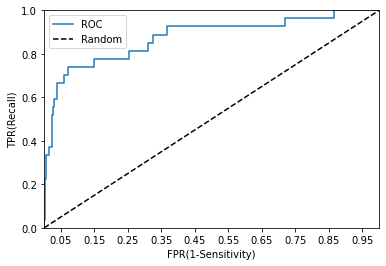

lda의 ROC AUC값: 0.8741


In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(MDA_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(MDA_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(MDA_y_test, lda_clf.predict_proba(MDA_x_test)[:,1])
pred_proba = lda_clf.predict_proba(MDA_x_test)[:,1]
roc_score = roc_auc_score(MDA_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


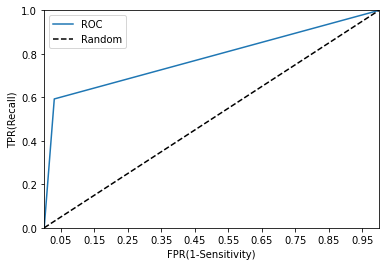

lda의 ROC AUC값: 0.7812


In [42]:
roc_curve_plot(MDA_y_test, lda_clf.predict(MDA_x_test))
roc_score = roc_auc_score(MDA_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

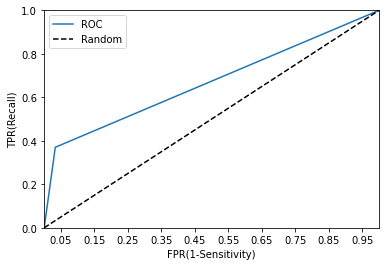

dt ROC AUC값: 0.6686


In [43]:
roc_curve_plot(MDA_y_test, dt_clf.predict_proba(MDA_x_test)[:,1])
pred_proba = dt_clf.predict_proba(MDA_x_test)[:,1]
roc_score = roc_auc_score(MDA_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


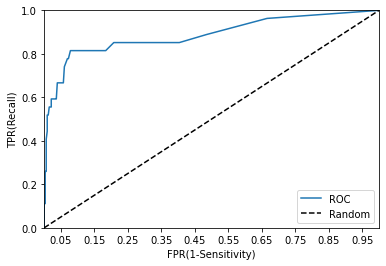

rf ROC AUC값: 0.8869


In [44]:
roc_curve_plot(MDA_y_test, rf_clf.predict_proba(MDA_x_test)[:,1])
pred_proba = rf_clf.predict_proba(MDA_x_test)[:,1]
roc_score = roc_auc_score(MDA_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

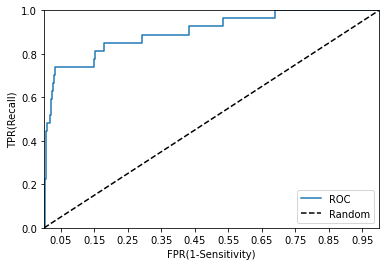

lr ROC AUC값: 0.9014


In [45]:
roc_curve_plot(MDA_y_test, lr_clf.predict_proba(MDA_x_test)[:,1])
pred_proba = lr_clf.predict_proba(MDA_x_test)[:,1]
roc_score = roc_auc_score(MDA_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

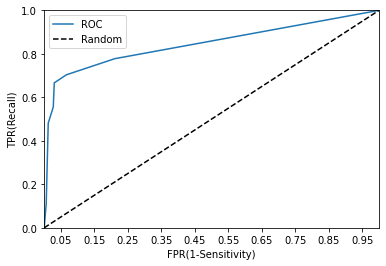

knn ROC AUC값: 0.8451


In [46]:
roc_curve_plot(MDA_y_test, knn_clf.predict_proba(MDA_x_test)[:,1])
pred_proba = knn_clf.predict_proba(MDA_x_test)[:,1]
roc_score = roc_auc_score(MDA_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))